# Activity 3: Higher Order Systems

For this unit the focus is on higher order systems of differential equations. We've already encountered one of these in Acitivty 2 with the mass on a spring. This was a *second* *order* *system* since the rate of change of position was equal to the velocity, and the rate of change of the velocity depended on the position. Let's remind ourselves how that worked:

1) (definition of $v$)

$$ \frac{dx}{dt} = v $$ 

2) Since the spring force is $F=-kx$, but $F = ma = m dv/dt \rightarrow a = -k x/m$ but $a=dv/dt$ so that means:

$$ \frac{dv}{dt} = -k x/m $$

But note that $dv/dt$ can also be written as $d^2x/dt^2$ so:

$$ \frac{d^2x}{dt^2} + k x/m = 0 $$

which is clearly a second order system since the highest derivative is a second derivative.

So, that means we can think of a second order system as a single equation whose highest derivative is a second dirivative, or we can think of it as two coupled first order systems. One advantage of thinking of a complicated system as a collection of coupled first order systems is that the numerical methods we developed in Acivity 2 are easily generalized to handle many coupled first order system, it's not so easy to apply them to a single higher order differential equation.

## Sympy

This activity will focus on learning some new computer tools that will help us to solve higher order systems analytically. We'll by using a python package called [sympy](https://www.sympy.org/en/index.html). Follow along here as we practice solving higher order systems analytically with sympy.

First: Import the sympy library:

In [12]:
import sympy as sp


Next, let's define two general purpose symbolic variables $A$ and $s$ that can be anything.

We'll also define a symbolic variable, $t$, that will certainly be *real*.

In [55]:
A,s = sp.symbols("A,s")
t = sp.symbols("t", real=True)

Suppose we have a differential equation:

$$ f''(t) + 3 f'(t) + 7 f(t) = 0 $$

Next, suppose we decide to try a potential solution $f$ that's a function built from the variables we've already defined:

In [56]:
f = A*sp.exp(s*t)

To get the derivative of a function in `sympy` we can use the `diff` method. Let's use this method to substitute our proposed solution into the differential equation to see what we get:

In [57]:
de = f.diff(t,t) + 3*f.diff(t) + 7*f
de

A*s**2*exp(s*t) + 3*A*s*exp(s*t) + 7*A*exp(s*t)

Oh! Interesting. Note the common factors of $A$ and $e^{st}$! We can ask `sympy` to factor those out:

In [58]:
sp.factor(de)

A*(s**2 + 3*s + 7)*exp(s*t)

Note that since $e^{st}$ is never zero, and $A$ is only zero in the trivial solution (where $f$ is zero everywhen) the only non-trivial solutions are when $s^2 + 3s + 7 = 0$. We can use `sympy` to solve for those values of $s$ like this:

In [59]:
sols = sp.solve(de,s)
sols

[-3/2 - sqrt(19)*I/2, -3/2 + sqrt(19)*I/2]

So! There are only two values of $s$ that solve this equation: $s_-=-3/2 - i \sqrt{19}/2$ and $s_+=-3/2 + i \sqrt{19}/2$.

Note that in `sympy` the constant `I` is our old friend $i=\sqrt{-1}$. Let's consider one of these solutions where $s=s_+=-3/2 + i \sqrt{19}/2$.

$$ f_+(t) = A e^{(-\frac{3}{2} + i\sqrt{19})t} = A e^{-\frac{3}{2} t} \left [\cos(\sqrt{19}t) + i \sin(\sqrt{19} t)\right ]$$

How can we visualize this in time? Note that the factor in front is exponentially decaying and the complex number in square brackets has a constant magnitude, but it rotates in the complex plane with a frequency of $\omega = \sqrt{19}$

Let's use matplotlib to show this! Note that in python $\sqrt{-1} = i$ is written as `1j`. Also, let's $f_+(0) = 1$.


In [60]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Real and Imaginary parts of $f_+(t)=Ae^{s_+ t}$')

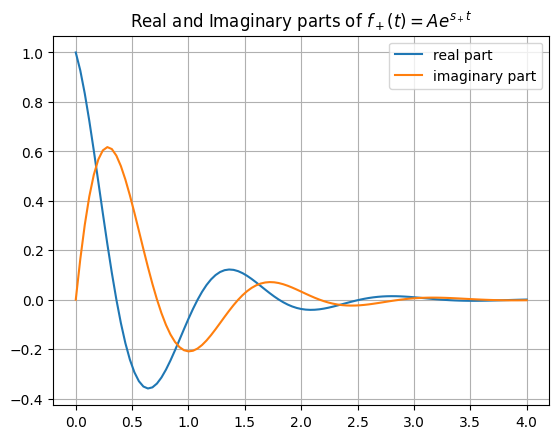

In [61]:
tn = np.linspace(0,4,101)  # numerical time array
An = 1 # numerical amplitude
s = -3/2 + 1j*np.sqrt(19)
fn = An*np.exp(s*tn)

plt.plot(tn,np.real(fn),label="real part")
plt.plot(tn,np.imag(fn),label="imaginary part")
plt.grid()
plt.legend()
plt.title("Real and Imaginary parts of $f_+(t)=Ae^{s_+ t}$")

Now let's plot that in the complex plane:

Text(0, 0.5, 'Imaginary part')

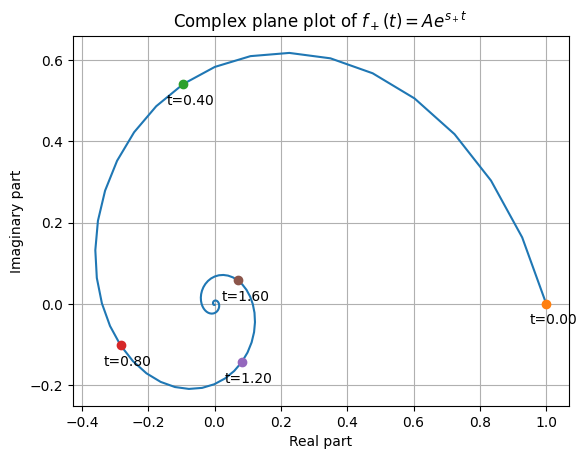

In [62]:
plt.plot(np.real(fn),np.imag(fn))
for i in range(0, 50, 10):
    plt.plot(np.real(fn[i]),np.imag(fn[i]),'o')
    plt.text(np.real(fn[i])-.05,np.imag(fn[i])-.05,f"t={tn[i]:.2f}")
plt.grid()
plt.title("Complex plane plot of $f_+(t)=Ae^{s_+ t}$")
plt.xlabel("Real part")
plt.ylabel("Imaginary part")

Now let's look at the $s_-$ solution:

Text(0.5, 1.0, 'Real and Imaginary parts of $f_-(t)=Ae^{s_- t}$')

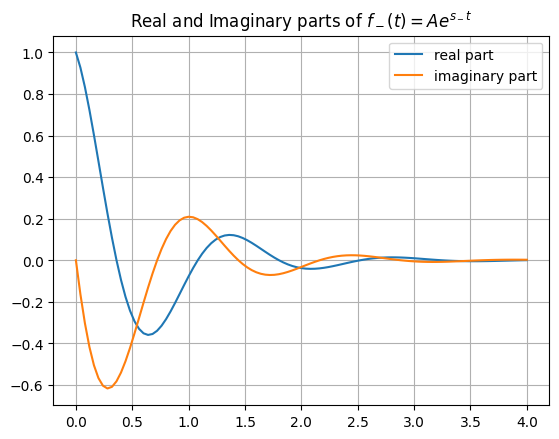

In [63]:
s = -3/2 - 1j*np.sqrt(19)
fn = An*np.exp(s*tn)

plt.plot(tn,np.real(fn),label="real part")
plt.plot(tn,np.imag(fn),label="imaginary part")
plt.grid()
plt.legend()
plt.title("Real and Imaginary parts of $f_-(t)=Ae^{s_- t}$")

Text(0, 0.5, 'Imaginary part')

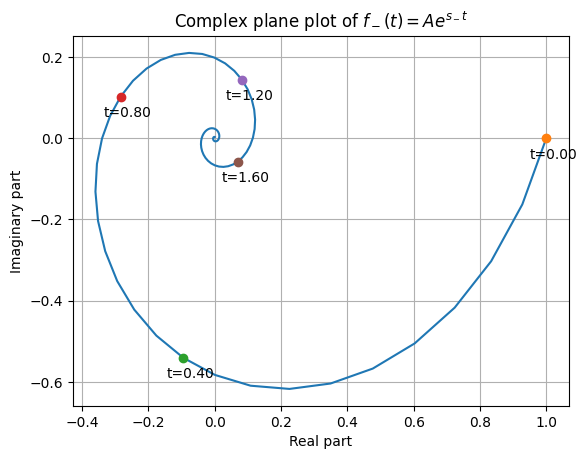

In [64]:
plt.plot(np.real(fn),np.imag(fn))
for i in range(0, 50, 10):
    plt.plot(np.real(fn[i]),np.imag(fn[i]),'o')
    plt.text(np.real(fn[i])-.05,np.imag(fn[i])-.05,f"t={tn[i]:.2f}")
plt.grid()
plt.title("Complex plane plot of $f_-(t)=Ae^{s_- t}$")
plt.xlabel("Real part")
plt.ylabel("Imaginary part")

Note: This is just the reflection of the first $s_+$ solution about the real axis! In the end, in most "real world" situations we need "real" solutions, so we create superpositions of these two solutions, with arbitrary constants, so that we can satisify the initial conditions and have a real solution in the end. Sometimes it's easier to work with the (possibly) complex solutions $A_+ e^{s_+ t}$ and $A_-e^{s_- t}$ and sometimes it's easier to rewrite these as (equivalent) superpositions of real exponentials multiplied by `sin` and `cos` functions.

Also since $e^{i\theta} = \cos(\theta) + i\sin(\theta)$, if we have complex roots, we can always translate back and forth between these two equivlent representations using this fact.

Indeed let's take the real part of $f_+(t)$:


In [65]:
sp.re(f.subs(s,sols[0]).subs(A,1))

exp(t*re(s))*cos(t*im(s))

So you can see mathematically that the real part of $f_+(t)$ (when $f(0)=1$) is just a real exponential times a `cos` function just as shown in the blue curves of the solution graphs (versus time) above.



# Using sympy to solve equations symbolically

Another useful skill is to apply sympy to solve differential equations directly using the `dsolve` function. 

In [66]:
%reset 
# clear memory and start over

Nothing done.


In [67]:
import sympy as sp

In [68]:
f = sp.symbols("f", cls=sp.Function)
t = sp.symbols("t", real=True)

In [69]:
soln = sp.dsolve(f(t).diff(t,t) + 3*f(t).diff(t) + 7*f(t),f(t), ics={f(0):1, f(t).diff(t).subs(t,0):-1.5}) # why is f'(0) = -1.5?
soln

Eq(f(t), 1.0*exp(-3*t/2)*cos(sqrt(19)*t/2))

The `dsolve` function of sympy takes 1) the differential equation (using diff(t) and diff(t,t) for first and second derivatives, respectively), 2) the function to solve for, and 3) the initial conditions (optional). You can see we get the same solution from earlier! (But with a lot less work.)

In [49]:
soln.rhs

1.0*exp(-3*t/2)*cos(sqrt(19)*t/2)

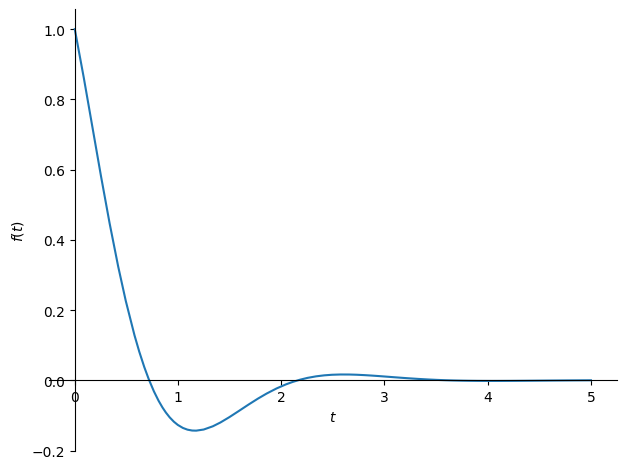

In [50]:
sp.plot(soln.rhs,(t,0,5))

It's easy to change the initial conditions:



In [70]:
soln = sp.dsolve(f(t).diff(t,t) + 3*f(t).diff(t) + 7*f(t),f(t), ics={f(0):1, f(t).diff(t).subs(t,0):0}) # Now start with f'(0) = 0
soln

Eq(f(t), (3*sqrt(19)*sin(sqrt(19)*t/2)/19 + cos(sqrt(19)*t/2))*exp(-3*t/2))

In [71]:
soln.rhs

(3*sqrt(19)*sin(sqrt(19)*t/2)/19 + cos(sqrt(19)*t/2))*exp(-3*t/2)

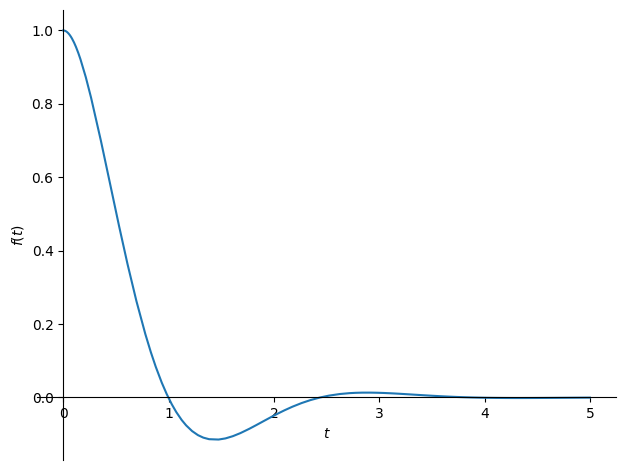

In [72]:
sp.plot(soln.rhs,(t,0,5))

See that this time the solution starts with zero slope. How could you find this solution manually? Try it!

# Now it's your turn.  

1) Suppose we have a mass of 2 kg and a spring with stiffness 20 N/m. Let's ignore damping for this one.

Write down a differential equation for this system. Substitude the potential solution $y(t) =  A e^{st} $ and find the roots $s_+$, and $s_-$.

Plot the real and imaginary parts of $y_+(t)$ and $y_-(t)$ assuming $A$ is real and $y_+(0) = 1$ and $y_-(0) = 1$ (as shown in the example above) as a function of time, for more than one oscillations (maybe 2 or 3?).

Also, plot the trajectory of each solution in the complex plane for at least one oscillation.

What is the frequency of this motion? What is the period?

2) Now let's add damping. Suppose there's a damper on the mass that produces a force of $F = -0.5 dy/dt$.

Write down a differential equation for this system. Substitude the potential solution $y(t) =  A e^{st} $ and find the roots $s_+$, and $s_-$.

Plot the real and imaginary parts of $y_+(t)$ and $y_-(t)$ assuming $A$ is real and $y_+(0) = 1$ and $y_-(0) = 1$ (as shown in the example above) as a function of time, for more than one oscillations (maybe 2 or 3?).

Also, plot the trajectory of each solution in the complex plane for at least one oscillation.

What is the approximate frequency of this new motion? What is the approximate period?